<a href="https://colab.research.google.com/github/Sfgiovanni/classificacao---binaria/blob/main/Classifica%C3%A7%C3%A3o_Binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Explorando os dados**



In [75]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [76]:
df.shape

(569, 35)

In [77]:
df.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [78]:
419/569

0.7363796133567663

Removendo a coluna exame_33 pois há muitos dados nulos (aproximadamente 73%)

In [79]:
df.drop(columns =['exame_33'], inplace = True) 

**Primeira versão do modelo**

In [80]:
x = df.drop(columns = ['id','diagnostico'])
y = df['diagnostico']

In [81]:
from sklearn.model_selection import train_test_split
from numpy import random

def train_test(x,y):
  seed = 4895
  random.seed(seed)

  x_train,x_test,y_train,y_test = train_test_split(x,y)
  return x_train,x_test,y_train,y_test

In [120]:
from sklearn.ensemble import RandomForestClassifier

def score_model(X_train,X_test,y_train,y_test):
  model = RandomForestClassifier(n_estimators = 100)
  model.fit(X_train,y_train)
  print('Acerto do modelo: {:.2f} %'.format(model.score(X_test,y_test) * 100))

In [121]:
x_train,x_test,y_train,y_test = train_test(x,y)

In [122]:
score_model(x_train,x_test,y_train,y_test)

Acerto do modelo: 96.50 %


**Comparando o primeiro modelo com o DummyClassifier**

In [123]:
from sklearn.dummy import DummyClassifier

def score_dummy_model(X_train,X_test,y_train,y_test):
  dummy_model = DummyClassifier(strategy= 'most_frequent')
  dummy_model.fit(X_train,y_train)
  print('Acerto do modelo: {:.2f} %'.format(dummy_model.score(X_test,y_test) * 100))


In [124]:
score_dummy_model(x_train,x_test,y_train,y_test)

Acerto do modelo: 68.53 %


**Explorando mais os dados**

In [125]:
from pandas.core.common import standardize_mapping
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(x)
x_v2 = standard.transform(x)
x_v2 = pd.DataFrame(x_v2, columns= x.keys())

def violinplot(x,inicio,fim):
  dados_plot = pd.concat([y,x.iloc[:,inicio:fim]], axis = 1)
  dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico',var_name = 'exames',value_name = 'valores')
  plt.figure(figsize = (10,10))
  sns.violinplot(x = 'exames',y = 'valores', hue = 'diagnostico', data = dados_plot, split = True)
  plt.xticks(rotation = 90)

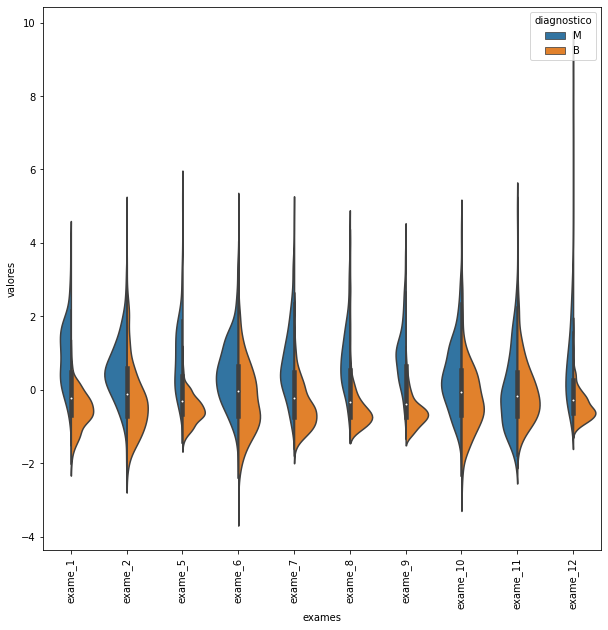

In [126]:
violinplot(x_v2,0,10)

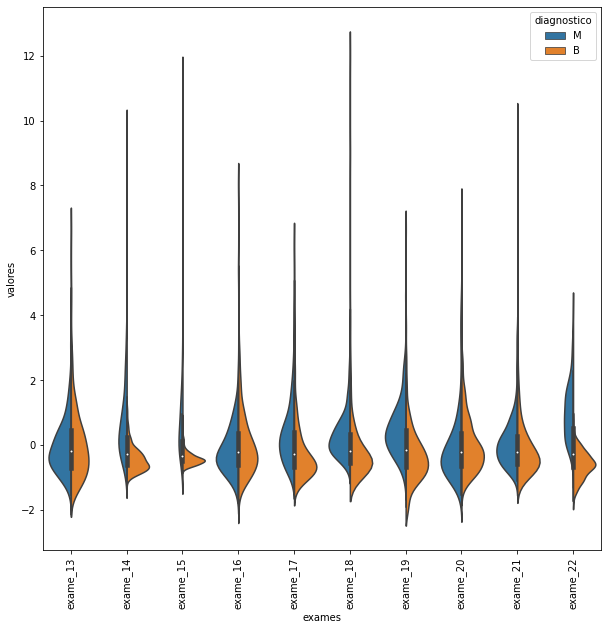

In [127]:
violinplot(x_v2,10,20)

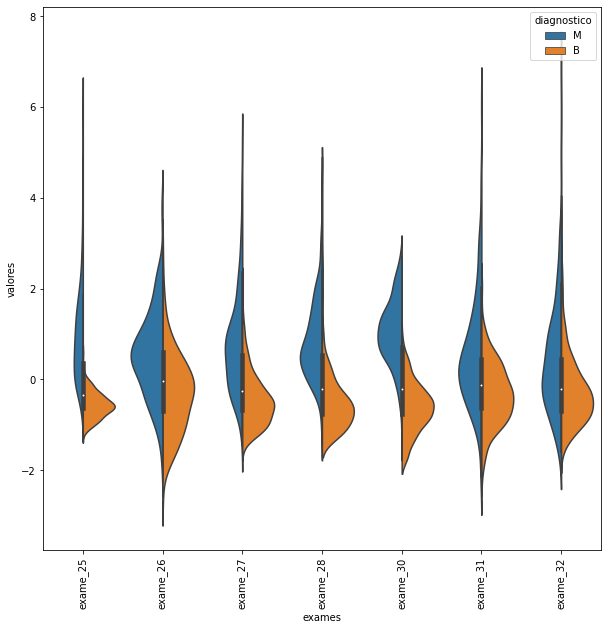

In [128]:
violinplot(x_v2,21,32)

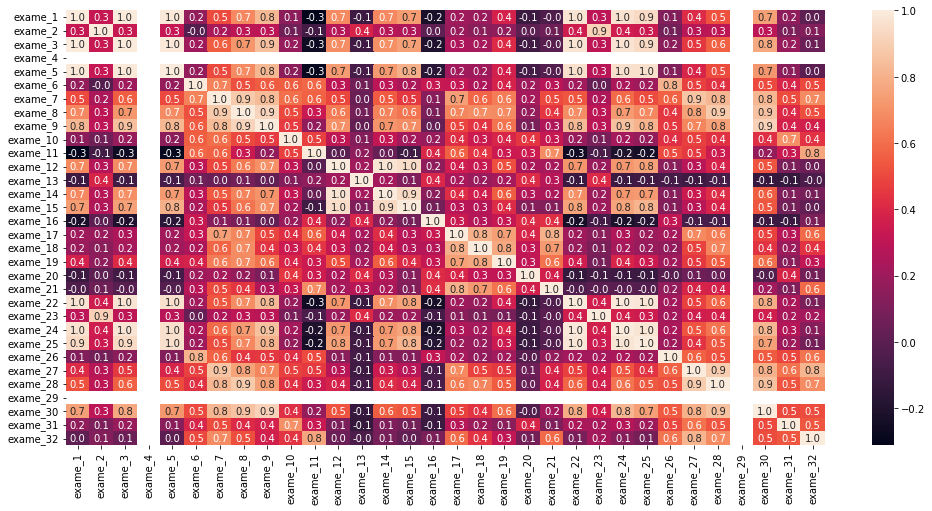

In [97]:
corr_matrix = x_v2.corr()
plt.figure(figsize = (17,8))
sns.heatmap(corr_matrix, annot = True,fmt = '.1f')

In [98]:
corr_matrix = corr_matrix[corr_matrix > 0.99]
corr_matrix

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
corr_matrix = corr_matrix.sum()
corr_matrix

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_4     0.000000
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_29    0.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [101]:
corr_vars = corr_matrix[corr_matrix > 1]
corr_vars

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

Removendo os exames 4 e 29 por apresentarem valores constantes

In [ ]:
x_v2.drop(columns = ['exame_4','exame_29'], inplace = True)

Removendo o exame 1 por ter forte relação com o exame 3 e removendo o exame 22 por ter forte relação com o exame 24

In [105]:
x_v2.drop(columns = ['exame_1','exame_22'], inplace = True)

**Testando o modelo com os novos valores de x**

In [131]:
x_train,x_test,y_train,y_test = train_test(x_v2,y)
score_model(x_train,x_test,y_train,y_test)

Acerto do modelo: 96.50 %


**Reduzindo mais a dimensão dos dados**

In [133]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

new_data = df.drop(columns = ['exame_4','exame_29','exame_3','exame_24'])
x = new_data.drop(columns = ['id','diagnostico'])

seed = 4895
random.seed(seed)
x_train,x_test,y_train,y_test = train_test(x,y)

selectkbest = SelectKBest(chi2, k = 5)
selectkbest.fit(x_train,y_train)

xkbest_train = selectkbest.transform(x_train)
xkbest_test = selectkbest.transform(x_test)

**Score do modelo com os dados de menor dimensionalidade**

In [134]:
score_model(xkbest_train,xkbest_test,y_train,y_test)

Acerto do modelo: 90.21 %


**Confusion Matrix**

In [135]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(xkbest_train,y_train)

RandomForestClassifier()

[Text(66.5, 0.5, 'Real'), Text(0.5, 48.5, 'Predição')]

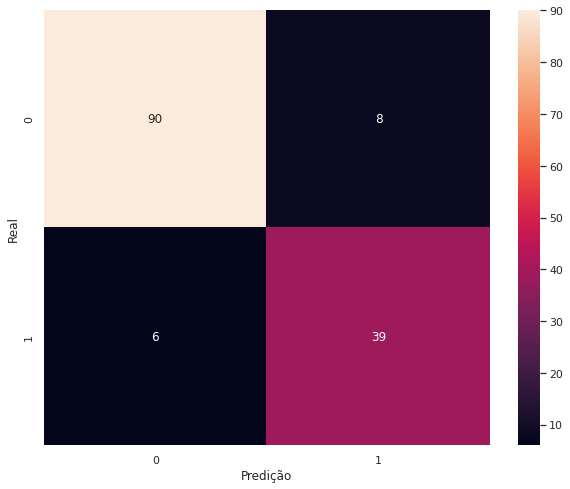

In [136]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,model.predict(xkbest_test))
plt.figure(figsize = (10,8))
sns.set()
sns.heatmap(conf_matrix, annot = True, fmt = 'd').set(xlabel = 'Predição',ylabel = 'Real')